In [1]:
%matplotlib inline
import chemical_evolution as chemevo
import nine_species_network as net9
import numpy as np
import matplotlib.pyplot as plt

In [2]:
species_info = net9.LoadingHook.load_species()
all_species = [
    chemevo.Species(name, 1, symbol=symbol)
    for name, symbol in species_info
]
HI, HII, HM, HeI, HeII, HeIII, H2I, H2II, de, gma, grn = [species.symbol for species in all_species]

In [3]:
reaction_info = net9.LoadingHook.load_reactions()
all_reactions = [
    chemevo.Reaction(eval(lhs), eval(rhs), rate=net9.HardCoded.calc_rate(1e5, i), rate_symbol=rate_symbol)
    for i, ((lhs, rhs), rate_symbol) in enumerate(reaction_info)
]

In [4]:
system = chemevo.ChemEvo(all_species, all_reactions)

In [5]:
from scipy.integrate import ode
integrator = ode(chemevo.sys_rhs)
integrator.set_integrator('vode')
integrator.set_initial_value([1 for species in system.all_species], 0)
integrator.set_f_params(system)

In [6]:
from scipy.integrate import odeint
t = np.arange(0, 1e8, 1e5)
y = odeint(
    chemevo.sys_rhs,
    [1 for species in system.all_species],
    t,
    args=(system,)
)

Text(0,0.5,'Amount')

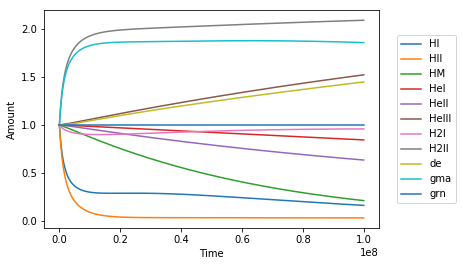

In [24]:
plt.plot(t, y)
plt.legend([species.name for species in system.all_species],
            bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.xlabel('Time')
plt.ylabel('Amount')

In [8]:
system.update(1)

AttributeError: 'ChemEvo' object has no attribute 'integrator'

In [ ]:
for i in range(0, 1024):
    if i % 100 == 0:
        print('Iteration %d' % i)
    system.update(1)

In [ ]:
time = np.linspace(0, 102400, 1025)
for species in all_species:
    plt.semilogy(time, species.amount_hist, label=species.name)
plt.legend()
# plt.ylim([0.99, 1.01])

In [ ]:
system.sys_rhs(np.nan, np.nan)

In [ ]:
system.sys_rhs(np.nan, np.nan)

In [ ]:
state = {**{rxn.rate_symbol: rxn.rate_val for rxn in system.all_reactions},
         **{species.symbol: species.amount for species in system.all_species}}
deltas = [
    system.rhs_dict[species].subs(state)
    for species in system.all_species
]
deltas